## Importing Libraries

In [2]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from time import sleep 
from webdriver_manager.chrome import ChromeDriverManager

## Collecting Links of the subpages 

In [3]:
from fake_useragent import UserAgent
user_agent = UserAgent().random
path=ChromeDriverManager().install()


url = 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds'

# Create a service object
chrome_service = Service(executable_path=path)
chrome_options=webdriver.ChromeOptions()
#chrome_options.add_argument("--maximize-windows")
chrome_options.add_argument("--start_maximized")
chrome_options.add_argument("--headless")
chrome_options.add_argument("user-agent="+user_agent)  # usinig different user agent every time we run the code to scape from the capcha

# Create a driver object using the service
driver = webdriver.Chrome(service=chrome_service,options=chrome_options)

user_agent = driver.execute_script("return navigator.userAgent;")
print("Current User-Agent:", user_agent)

# Access the Website 
driver.get(url)
#driver.maximize_window()
try:
     # finding the subpage container 
    div_element = driver.find_element(By.XPATH, '//*[@id="list_36496_page_2"]/div[1]/nav')   #'//*[@id="list_36496_page_2"]/div[1]'

    
    # Finding all the subpages elements y the tag name 
    pages = div_element.find_elements(By.TAG_NAME, "span")

    # Collect href attributes (links) from each <a> tag element within the span elements
    link_for_subpages_list = []
    for page in pages:
        try:
            # Find the <a> element within the <span>
            a_element = page.find_element(By.TAG_NAME, "a")
            href = a_element.get_attribute("href")
            if href:
                link_for_subpages_list.append(href)
        except:
            pass

    print("List of href attributes:")
    for href in link_for_subpages_list:
        print(href)
except:
    print("No div element with provided XPath found.")


Current User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36
List of href attributes:
https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page=2
https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page=3
https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page=4
https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page=5
https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page=2
https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-world

## Generating Missing Links

In [4]:
all_links_of_subpages=[]
for i in range(1,15):
    concat=lambda i:'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page=='+str(i)
    all_links_of_subpages.append(concat(i))

all_links_of_subpages

['https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==1',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==2',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==3',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==4',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==5',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==6',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elementa

There are 7 missing links for the subpage. But since we Get the pattern we Decided to Generate the remaining links.

In [12]:
all_links_of_subpages = list(map(lambda i: 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==' + str(i), range(1, 14)))

['https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==1',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==2',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==3',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==4',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==5',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds?page==6',
 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elementa

## Collecting the Links for all Books 

In [5]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from time import sleep 

test_pages=all_links_of_subpages[0:14]  # for the time, we just scrapping the first two subpages 

#url = 'https://bookshop.org/lists/the-healing-power-of-nature-on-creating-a-meaningful-partnership-with-the-animal-elemental-and-plant-worlds'

# Create a service object
chrome_service = Service(executable_path=path)

# Create a driver object using the service
driver=webdriver.Chrome(service=chrome_service,options=chrome_options)

# Accessing the website 
driver.get(url)

Publish_Date_all=[]
link_for_all_book =[]

for pages in test_pages:                                # to iterate through the subpages
    chrome_service = Service(executable_path=path)
    driver=webdriver.Chrome(service=chrome_service,options=chrome_options)
    driver.get(pages)                                   # Accessing the page 
    
    ##### for finding the link to each book 
    # Find all <a> tags
    links = driver.find_elements(By.TAG_NAME, 'a')      # Looking for the <a >
    #Iterate through the links
    link_for_each_book_per_page=[]
    for link in links:
        href = link.get_attribute('href')               # Get the href attribute value
        if href and '/p/books/' in href:
            link_for_each_book_per_page.append(href)
    link_for_each_book_per_page=set(link_for_each_book_per_page)          # to remove the duplicated links 
    link_for_each_book_per_page=list(link_for_each_book_per_page)         # convert back to list for the convineince 
    link_for_all_book.append(link_for_each_book_per_page)
    link_for_all_book=link_for_all_book+link_for_each_book_per_page
    driver.quit()
print(len(link_for_all_book))


364


## Filtering the Links 

In [6]:
import re
# Count the number of links that match the pattern
filtered_links = [link for link in link_for_all_book if isinstance(link, str) and re.search('https://bookshop', link)]
print("Number of filtered links:", len(filtered_links))


Number of filtered links: 350


## Scrapping the Data for Each Book

**Price, Publisher, Publish_Date, Language**

In [ ]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from tqdm import tqdm
from selenium import webdriver
from time import sleep 

Publish_Date=[]
# Create a new driver instance for each book URL and fetch data
for book_link in tqdm(filtered_links,desc='Fetching Data'):
    # Create a new driver instance for each book URL
    driver_book = webdriver.Chrome(service=chrome_service,options=chrome_options)
    driver_book.get(book_link)
    
    XPATH_publish_data=['//*[@id="content"]/div[2]/div[3]/div[7]/div/div[6]',"//div[@itemprop='datePublished']"]


    for path in XPATH_publish_data:
        try:
            WebDriverWait(driver_book,10).until(EC.visibility_of_element_located((By.XPATH,path)))  # to wait until the element apears and to increase the efficiency of the crawler
            sleep(np.random(chisquare(1)))
            publish_date=driver_book.find_element(By.XPATH,path)
            Publish_Date.append(publish_date.text)
            break
        except:   
            continue
    driver_book.quit()
print(len(Publish_Date),Publish_Date)

Fetching Data:   0%|                                                                           | 0/350 [00:00<?, ?it/s]

### Fetching Price, Publisher and Language

In [ ]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
from tqdm import tqdm
from selenium import webdriver
from time import sleep 


Language=[]
Publisher=[]
Price=[]
xpath_expressions = ['//*[@id="content"]/div[2]/div[2]/div[7]/div/div[2]','//*[@id="content"]/div[2]/div[3]/div[7]/div/div[1]']

XPATH_publishers =['//*[@id="content"]/div[2]/div[3]/div[7]/div/div[4]','//*[@id="content"]/div[2]/div[2]/div[7]/div/div[4]']

XPATH_language=['//*[@id="content"]/div[2]/div[2]/div[7]/div/div[12]','//*[@id="content"]/div[2]/div[3]/div[7]/div/div[12]']


for book_link in tqdm(filtered_links,desc='Fetching Data'):
    driver_book = webdriver.Chrome(service=chrome_service,options=chrome_options)
    driver_book.get(book_link)
    #sleep(1)  # to give enough time to fetch the data
    
    for path in XPATH_publishers:   # Find the div containing product details
        try:
            WebDriverWait(driver_book,10).until(EC.visibility_of_element_located((By.XPATH,path)))
            sleep(np.random.chisquare(1)+1)
            publisher=driver_book.find_element(By.XPATH,path)
            Publisher.append(publisher.text) 
            
            break
        except:
            continue
            
     
    
    for pathh in XPATH_language:
        try:
            WebDriverWait(driver_book,10).until(EC.visibility_of_element_located((By.XPATH,pathh)))
            sleep(np.random.chisquare(1))
            language=driver_book.find_element(By.XPATH,pathh)
            Language.append(language.text)
            break
        except:
            continue

    price = None
    for xpath_expr in xpath_expressions:
        try:
            WebDriverWait(driver_book,10).until(EC.visibility_of_element_located((By.XPATH,xpath_expr)))
            sleep(np.random.chisquare(1)+1)
            price_element = driver_book.find_element(By.XPATH, xpath_expr)
            price = price_element.text
            break
        except NoSuchElementException:
            continue
    if price is not None:
        Price.append(price)
    else:
        print("Price not found for", book_link)
            
    driver_book.quit()
print('Publisher',len(Publisher),'Language : ',len(Language),'Price : ',len(Price))
print(Publisher,Language,Price)


### Creating Data Frame 

In [19]:
import pandas as pd
df=pd.DataFrame({'Language':Language,'Publisher':Publisher,'Publish_Date':Publish_Date,'Price':Price})
df.head()

,Language,Publisher,Publish_Date,Price
0,English,Tin House Books,"April 02, 2024",$19.95 $18.55
1,English,Hay House,"May 25, 2021",$22.99 $21.38
2,English,Artisan Publishers,"July 11, 2023",$20.00 $18.60
3,English,Scribner Book Company,"April 04, 2023",$27.99 $26.03
4,English,Chelsea Green Publishing Company,"February 21, 2023",$28.00 $26.04


## Data Processing and Visualization 

In [26]:
import os 
import pandas as pd
Data=pd.read_csv('Books_Scrapped_Data.csv')
Data = Data[~Data['Price'].str.contains('Price', na=False)]

# Split the 'Price' column into two separate columns
Data[['Price1', 'Price2']] = Data['Price'].str.split(expand=True)

# Fill NaN values in 'Price2' column with corresponding values from 'Price1' column
Data['Price2'] = Data['Price2'].fillna(Data['Price1'])

# Remove non-numeric characters and convert to float for both 'Price1' and 'Price2' columns
Data['Price1'] = Data['Price1'].str.replace('[^\d.]+', '', regex=True).astype(float)
Data['Price2'] = Data['Price2'].str.replace('[^\d.]+', '', regex=True).astype(float)

# Delete the original 'Price' column
Data = Data.drop('Price', axis=1)

# Print the DataFrame with values converted to float
print(Data)

    Language                         Publisher        Publish_Date  Price1  \
0      Other                   Chronicle Books   December 07, 2021   19.95   
1    English                 Milkweed Editions      April 02, 2024   25.00   
3    English                 Timber Press (OR)    October 25, 2022   30.00   
4    English                         Hay House        May 25, 2021   22.99   
5    English                         Red Wheel     August 01, 2021   16.95   
..       ...                               ...                 ...     ...   
320  English  Chelsea Green Publishing Company   February 21, 2023   28.00   
321  English                Mountaineers Books  September 11, 2023   21.95   
322  English                   Lee & Low Books  September 20, 2022   20.95   
323  English                Artisan Publishers       July 11, 2023   20.00   
324  English                Mountaineers Books   February 13, 2023   29.95   

     Price2  
0     18.55  
1     23.25  
3     27.90  
4     2

In [39]:
Data['Change_in_Price']=Data['Price1']-Data['Price2']

Data=Data.drop(['Change in Price'],axis=1)
Data.head()

,Language,Publisher,Publish_Date,Price1,Price2,Year,Change_in_Price
0,Other,Chronicle Books,"December 07, 2021",19.95,18.55,2021,1.40
1,English,Milkweed Editions,"April 02, 2024",25.00,23.25,2024,1.75
3,English,Timber Press (OR),"October 25, 2022",30.00,27.90,2022,2.10
4,English,Hay House,"May 25, 2021",22.99,21.38,2021,1.61
5,English,Red Wheel,"August 01, 2021",16.95,15.76,2021,1.19


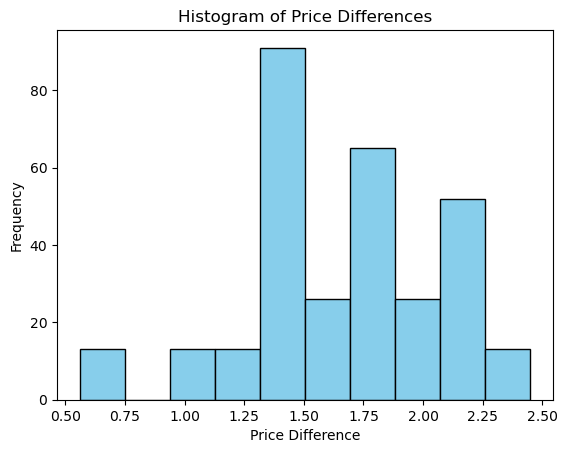

In [40]:
import matplotlib.pyplot as plt

plt.hist(Data['Change_in_Price'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Price Differences')

# Show plot
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

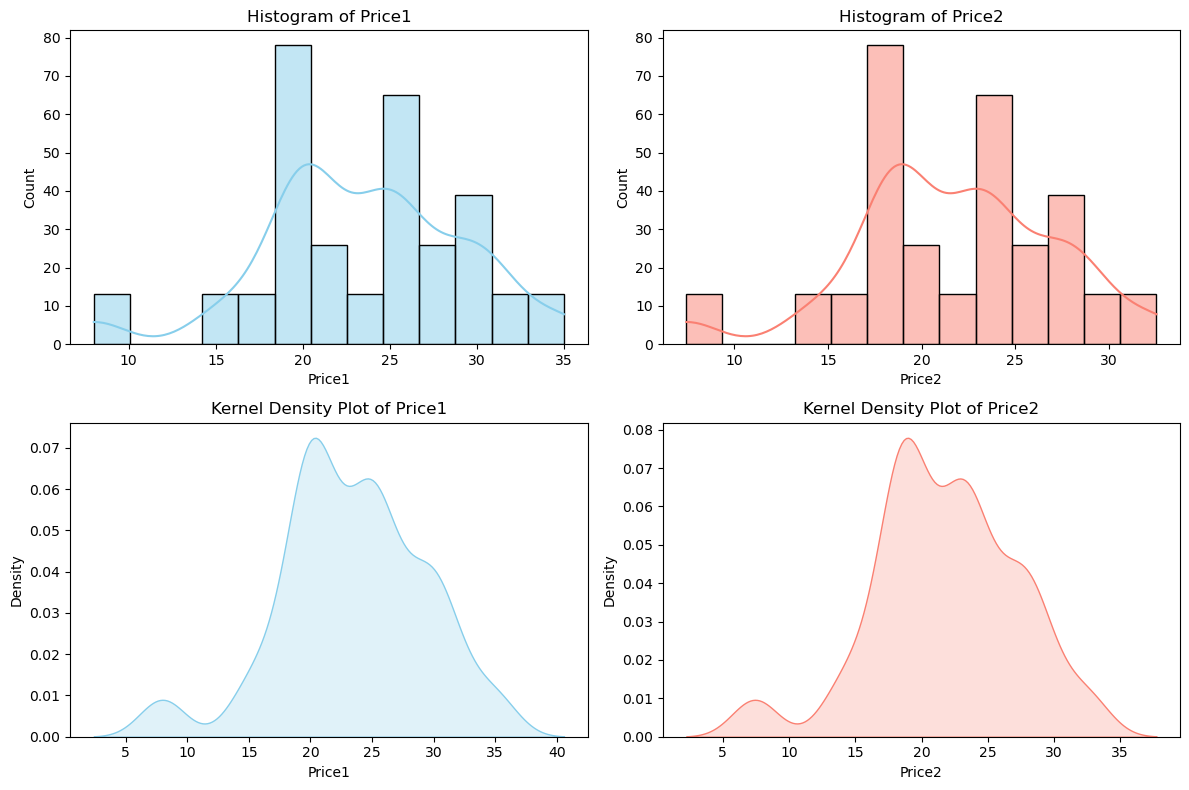

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for Price1 and Price2
sns.histplot(Data['Price1'], ax=axes[0, 0], color='skyblue', kde=True)
axes[0, 0].set_title('Histogram of Price1')

sns.histplot(Data['Price2'], ax=axes[0, 1], color='salmon', kde=True)
axes[0, 1].set_title('Histogram of Price2')

# Plot kernel density plots for Price1 and Price2
sns.kdeplot(Data['Price1'], ax=axes[1, 0], color='skyblue', fill=True)
axes[1, 0].set_title('Kernel Density Plot of Price1')

sns.kdeplot(Data['Price2'], ax=axes[1, 1], color='salmon', fill=True)
axes[1, 1].set_title('Kernel Density Plot of Price2')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

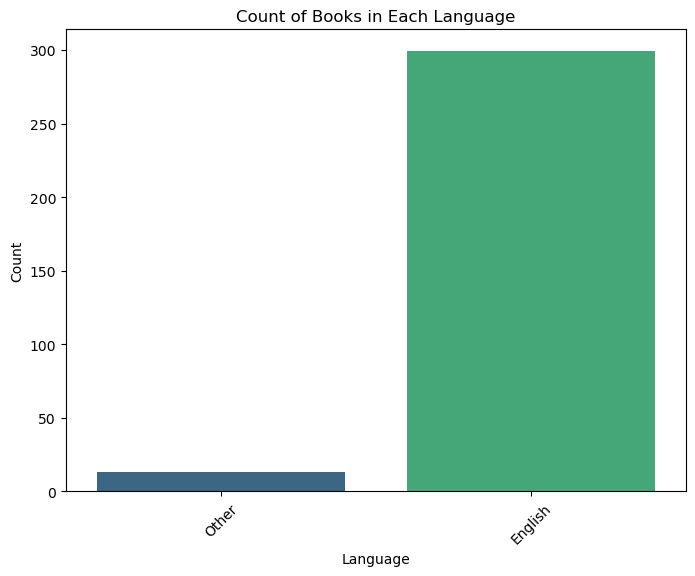

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of books in each language
plt.figure(figsize=(8, 6))
sns.countplot(data=Data, x='Language', palette='viridis')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Count of Books in Each Language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

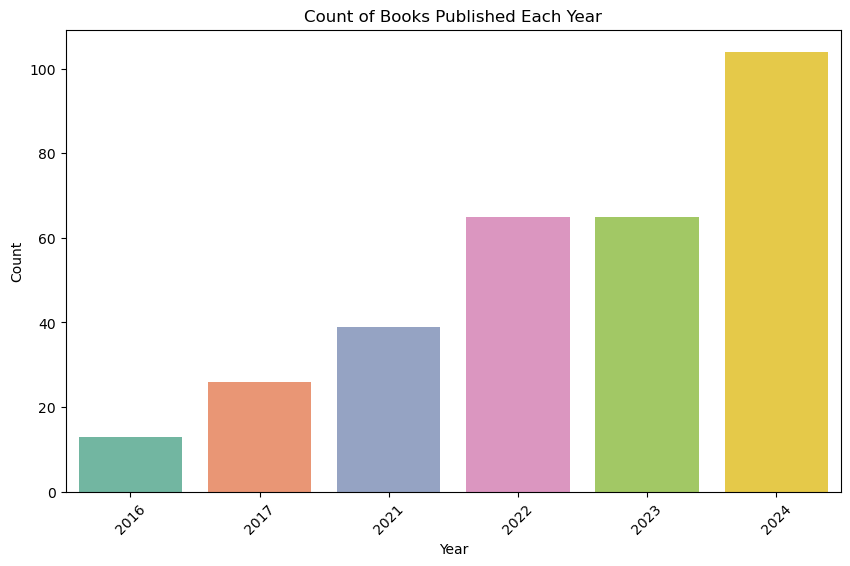

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Publish_Date to datetime and extract the year
Data['Year'] = pd.to_datetime(Data['Publish_Date']).dt.year

# Create a count plot of books published in each year
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='Year', palette='Set2')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Books Published Each Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [36]:
import sqlite3
conn = sqlite3.connect('C:\\Users\\asus\\Desktop\\Data Science\\Web Scrapping\\Book_store_Scrapped_Data.db')

# Create a cursor object to interact with the database
cur = conn.cursor()

# Create a table
cur.execute('''CREATE TABLE IF NOT EXISTS Processed_Data(
               id INTEGER PRIMARY KEY,
               Publish_Date TEXT ,
               Publisher TEXT,
               Language TEXT,
               Price1 double,
               Price2 double,
               Change_in_Price double,
               Year
               )''')
cur.close()
conn.close()

In [42]:
import sqlite3
import pandas as pd

# Assuming df is your DataFrame containing data
# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\asus\\Desktop\\Data Science\\Web Scrapping\\Book_store_Scrapped_Data.db')

# Write DataFrame to SQLite table
Data.to_sql('Processed_Data', conn, if_exists='append', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()

In [44]:
import pandas as pd

# Assuming you have a DataFrame named df

# Save DataFrame to CSV file
Data.to_csv('Processed_Data.csv', index=False)